store--->:  no
entered True line
Year 2013: 12271
Year 2014: 43796
Year 2015: 39362
Montag: 11099
Dienstag: 12309
Mittwoch: 13060
Donnerstag: 13113
Freitag: 15680
Samstag: 20831
Sonntag: 9337
MonthJanTotal: 8038
MonthFebTotal: 6983
MonthMarTotal: 8142
MonthAprTotal: 7264
MonthMayTotal: 7927
MonthJunTotal: 6936
MonthJulTotal: 7314
MonthAugTotal: 7535
MonthSepTotal: 6932
MonthOctTotal: 11742
MonthNovTotal: 9410
MonthDecTotal: 7206
CALAMARI Inventory: 3232
FISCH Inventory: 3562
GARNELEN Inventory: 7615
HAEHNCHEN Inventory: 23101
KOEFTE Inventory: 16788
LAMM Inventory: 24046
STEAK Inventory: 17085
TOTAL_FISCHPROD Inventory: 14409
TOTAL_FLEISCH Inventory: 81020


,Sr.No.,DEMAND_DATE,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag,MONTH_JAN,MONTH_FEB,MONTH_MAR,MONTH_APR,MONTH_MAY,MONTH_JUN,MONTH_JUL,MONTH_AUG,MONTH_SEP,MONTH_OCT,MONTH_NOV,MONTH_DEC,YEAR_2013,YEAR_2014,YEAR_2015,CALAMARI,FISCH,GARNELEN,HAEHNCHEN,KOEFTE,LAMM,STEAK,TOTAL_FISCHPROD,TOTAL_FLEISCH,TOTAL,CALAMARI_DEMAND_T1,CALAMARI_DEMAND_T2,CALAMARI_DEMAND_T3,CALAMARI_DEMAND_T4,CALAMARI_DEMAND_T5,CALAMARI_DEMAND_T6,CALAMARI_DEMAND_T7,FISCH_DEMAND_T1,FISCH_DEMAND_T2,FISCH_DEMAND_T3,FISCH_DEMAND_T4,FISCH_DEMAND_T5,FISCH_DEMAND_T6,FISCH_DEMAND_T7,GARNELEN_DEMAND_T1,GARNELEN_DEMAND_T2,GARNELEN_DEMAND_T3,GARNELEN_DEMAND_T4,GARNELEN_DEMAND_T5,GARNELEN_DEMAND_T6,GARNELEN_DEMAND_T7,HAEHNCHEN_DEMAND_T1,HAEHNCHEN_DEMAND_T2,HAEHNCHEN_DEMAND_T3,HAEHNCHEN_DEMAND_T4,HAEHNCHEN_DEMAND_T5,HAEHNCHEN_DEMAND_T6,HAEHNCHEN_DEMAND_T7,KOEFTE_DEMAND_T1,KOEFTE_DEMAND_T2,KOEFTE_DEMAND_T3,KOEFTE_DEMAND_T4,KOEFTE_DEMAND_T5,KOEFTE_DEMAND_T6,KOEFTE_DEMAND_T7,LAMM_DEMAND_T1,LAMM_DEMAND_T2,LAMM_DEMAND_T3,LAMM_DEMAND_T4,LAMM_DEMAND_T5,LAMM_DEMAND_T6,LAMM_DEMAND_T7,STEAK_DEMAND_T1,STEAK_DEMAND_T2,STEAK_DEMAND_T3,STEAK_DEMAND_T4,STEAK_DEMAND_T5,STEAK_DEMAND_T6,STEAK_DEMAND_T7,TOTAL_FISCHPROD_DEMAND_T1,TOTAL_FISCHPROD_DEMAND_T2,TOTAL_FISCHPROD_DEMAND_T3,TOTAL_FISCHPROD_DEMAND_T4,TOTAL_FISCHPROD_DEMAND_T5,TOTAL_FISCHPROD_DEMAND_T6,TOTAL_FISCHPROD_DEMAND_T7,TOTAL_FLEISCH_DEMAND_T1,TOTAL_FLEISCH_DEMAND_T2,TOTAL_FLEISCH_DEMAND_T3,TOTAL_FLEISCH_DEMAND_T4,TOTAL_FLEISCH_DEMAND_T5,TOTAL_FLEISCH_DEMAND_T6,TOTAL_FLEISCH_DEMAND_T7,TOTAL_DEMAND_T1,TOTAL_DEMAND_T2,TOTAL_DEMAND_T3,TOTAL_DEMAND_T4,TOTAL_DEMAND_T5,TOTAL_DEMAND_T6,TOTAL_DEMAND_T7,CALAMARI_CUM_DEMAND_T2,CALAMARI_CUM_DEMAND_T3,CALAMARI_CUM_DEMAND_T4,CALAMARI_CUM_DEMAND_T5,CALAMARI_CUM_DEMAND_T6,CALAMARI_CUM_DEMAND_T7,FISCH_CUM_DEMAND_T2,FISCH_CUM_DEMAND_T3,FISCH_CUM_DEMAND_T4,FISCH_CUM_DEMAND_T5,FISCH_CUM_DEMAND_T6,FISCH_CUM_DEMAND_T7,GARNELEN_CUM_DEMAND_T2,GARNELEN_CUM_DEMAND_T3,GARNELEN_CUM_DEMAND_T4,GARNELEN_CUM_DEMAND_T5,GARNELEN_CUM_DEMAND_T6,GARNELEN_CUM_DEMAND_T7,HAEHNCHEN_CUM_DEMAND_T2,HAEHNCHEN_CUM_DEMAND_T3,HAEHNCHEN_CUM_DEMAND_T4,HAEHNCHEN_CUM_DEMAND_T5,HAEHNCHEN_CUM_DEMAND_T6,HAEHNCHEN_CUM_DEMAND_T7,KOEFTE_CUM_DEMAND_T2,KOEFTE_CUM_DEMAND_T3,KOEFTE_CUM_DEMAND_T4,KOEFTE_CUM_DEMAND_T5,KOEFTE_CUM_DEMAND_T6,KOEFTE_CUM_DEMAND_T7,LAMM_CUM_DEMAND_T2,LAMM_CUM_DEMAND_T3,LAMM_CUM_DEMAND_T4,LAMM_CUM_DEMAND_T5,LAMM_CUM_DEMAND_T6,LAMM_CUM_DEMAND_T7,STEAK_CUM_DEMAND_T2,STEAK_CUM_DEMAND_T3,STEAK_CUM_DEMAND_T4,STEAK_CUM_DEMAND_T5,STEAK_CUM_DEMAND_T6,STEAK_CUM_DEMAND_T7,TOTAL_FISCHPROD_CUM_DEMAND_T2,TOTAL_FISCHPROD_CUM_DEMAND_T3,TOTAL_FISCHPROD_CUM_DEMAND_T4,TOTAL_FISCHPROD_CUM_DEMAND_T5,TOTAL_FISCHPROD_CUM_DEMAND_T6,TOTAL_FISCHPROD_CUM_DEMAND_T7,TOTAL_FLEISCH_CUM_DEMAND_T2,TOTAL_FLEISCH_CUM_DEMAND_T3,TOTAL_FLEISCH_CUM_DEMAND_T4,TOTAL_FLEISCH_CUM_DEMAND_T5,TOTAL_FLEISCH_CUM_DEMAND_T6,TOTAL_FLEISCH_CUM_DEMAND_T7,TOTAL_CUM_DEMAND_T2,TOTAL_CUM_DEMAND_T3,TOTAL_CUM_DEMAND_T4,TOTAL_CUM_DEMAND_T5,TOTAL_CUM_DEMAND_T6,TOTAL_CUM_DEMAND_T7,CALAMARI_HML_DEMAND_T7,FISCH_HML_DEMAND_T7,GARNELEN_HML_DEMAND_T7,HAEHNCHEN_HML_DEMAND_T7,KOEFTE_HML_DEMAND_T7,LAMM_HML_DEMAND_T7,STEAK_HML_DEMAND_T7,TOTAL_FISCHPROD_HML_DEMAND_T7,TOTAL_FLEISCH_HML_DEMAND_T7,TOTAL_HML_DEMAND_T7,CALAMARI_NO_DAYS_ABOVE_7D_MEAN,FISCH_NO_DAYS_ABOVE_7D_MEAN,GARNELEN_NO_DAYS_ABOVE_7D_MEAN,HAEHNCHEN_NO_DAYS_ABOVE_7D_MEAN,KOEFTE_NO_DAYS_ABOVE_7D_MEAN,LAMM_NO_DAYS_ABOVE_7D_MEAN,STEAK_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_ABOVE_7D_MEAN,TOTAL_NO_DAYS_ABOVE_7D_MEAN,CALAMARI_NO_DAYS_BELOW_7D_MEAN,FISCH_NO_DAYS_BELOW_7D_MEAN,GARNELEN_NO_DAYS_BELOW_7D_MEAN,HAEHNCHEN_NO_DAYS_BELOW_7D_MEAN,KOEFTE_NO_DAYS_BELOW_7D_MEAN,LAMM_NO_DAYS_BELOW_7D_MEAN,STEAK_NO_DAYS_BELOW_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_BELOW_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_BELOW_7D_MEAN,TOTAL_NO_DAYS_BELOW_7D_MEAN,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W2,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W3,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W4,FISCH_MEAN_SAME_WDAY_DEMANDS_W2,FISCH_MEAN_SAME_W

monday's demand:  161
tuesday's demand:  161
wednesday's demand:  161
thursday's demand:  160
friday's demand:  160
saturday's demand:  162
scaled demand--->
monday's demand:  16
tuesday's demand:  16
wednesday's demand:  16
thursday's demand:  16
friday's demand:  16
saturday's demand:  16


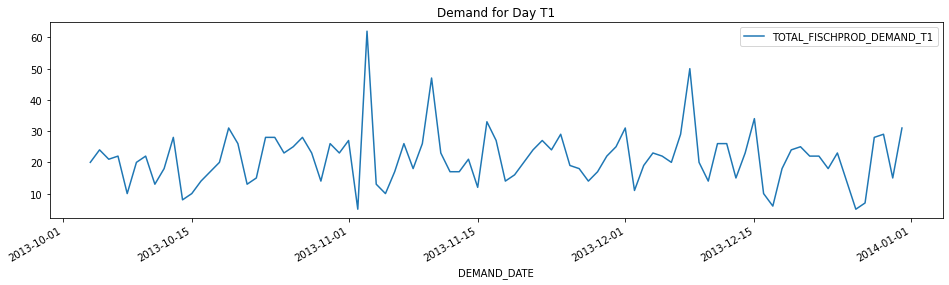

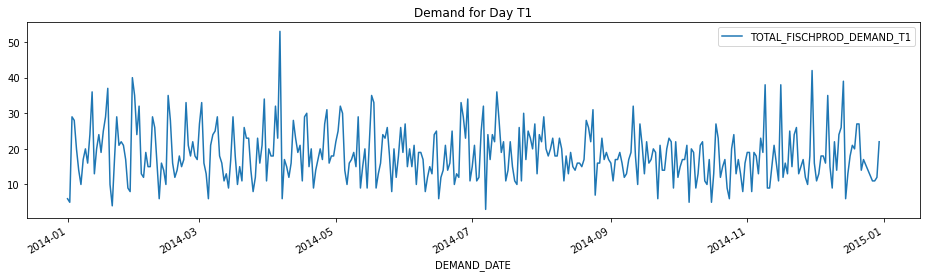

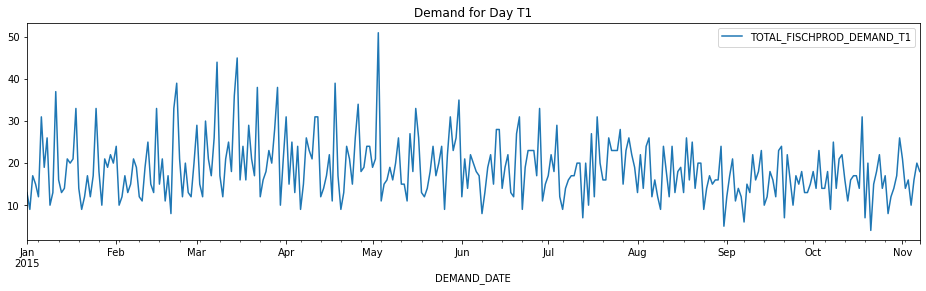

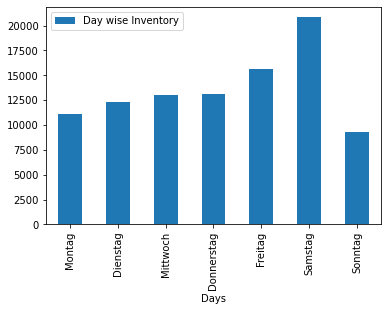

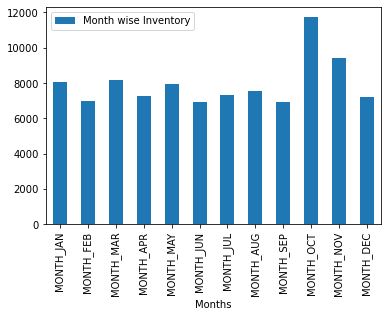

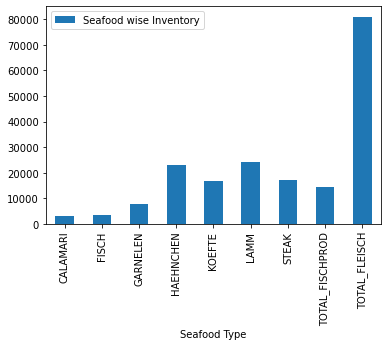

In [1]:
from Inventory_Environment_v1 import Env
import collections
import numpy as np
import random
import pickle
import os

import jproperties
from jproperties import Properties


from datetime import datetime
start_time = datetime.now()
# do your work here


### Create an empty Q-Dictionary if it does not exist:

In [2]:
m=50

In [3]:
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)
rewards_tracked = {(15,0):[],(25,1):[], (20,2): [], (30,3):[], (35,4):[], (10,5):[],(50,6):[]}

print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

0
7
0


### Import the latest dictionary if Q-Dictionary already exists:

In [4]:
if os.stat('Policy400000Episodes.pkl').st_size != 0:

    with open('Policy400000Episodes.pkl', 'rb') as handle:
        Q_dict = pickle.load(handle)
    
    with open('Rewards400000Episodes.pkl', 'rb') as handle:
        rewards_tracked = pickle.load(handle)    

    with open('States_tracked400000Episodes.pkl', 'rb') as handle:
        States_track = pickle.load(handle)    
    
    print(len(Q_dict))
    print(len(rewards_tracked))
    print(len(States_track))

In [5]:
#function to return valid actions

def valid_actions(state):
    
    state = int(state[0])
    valid_Actions = []
    
    for ix in range(0,m+1):
        valid_Actions.append(ix)
    return valid_Actions

In [6]:
#function to add Q-values to Q-dictionary

def add_to_dict(state,valid_act):
    
    if state not in Q_dict.keys():
        Q_dict[state] = {}
        for action in valid_act:
            Q_dict[state][action] = 0.0

In [7]:
#function to save Q-dictionary as a pickle file

def save_obj(obj, objname ):
    with open(objname + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [8]:
#function to initialise Q-values
def initialise_tracking_states():
    sample_q_values = [((15,0),12),((25,1),25),((20,2),10),((30,3),30),((35,4),15),((10,5),18),((50,6),10)]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         

In [9]:
#function to append latest Q-values of the 4 Q-values

def save_tracking_states():
    for st in States_track.keys():
        for action in States_track[st].keys():
            if st in Q_dict and action in Q_dict[st]:
                States_track[st][action].append(Q_dict[st][action])            

In [10]:
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7500000)/1700000)) + 1
    z = np.random.random()
        
    if z > epsilon:
        action = max(Q_dict[state],key=Q_dict[state].get)   #Exploitation: this gets the action for max q-value of current state
    else:
        action = np.random.choice(np.arange(0,m+1))    #Exploration: randomly chose the action
    
    return action

### Training

In [11]:
#Parameters

# EPISODES = 1
EPISODES = 400000  #400000 Episodes for Convergence Analysis Testing
# STEPS = 1
STEPS = 30                 
LR = 0.01                   #learning rate
GAMMA = 0.91


threshold = 2000       # Q-values: stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

In [12]:
IsStore = "yes"
configs = Properties()
with open('keywords.properties', 'rb') as read_prop:
    configs.load(read_prop)
    
prop_view = configs.items()
for item in prop_view:
    if ((item[0]) == "IsStore"):
        IsStore = item[1].data

In [13]:
def training():
    for episode in range(0,EPISODES):
    
        env = Env()      #creating an instance of the class
        #this initialises the state and parameters to initial value for new episode
        
#         print("env.IsStore: ",env.IsStore)
#         print("IsStore: ",IsStore)
        if(env.IsStore == IsStore):
#             print("===============START====================")
#             print("Entered program after store check.........")
            initial_state = env.state    #tracking reward
            curr_state = env.state       #start is day's evening for action
            #curr_state is state_mon

#             print("DEBUG: curr_state post store check------------->: ",curr_state)
#             print("DEBUG: initial_state post store check---------->: ",initial_state)
            add_to_dict(curr_state,valid_actions(curr_state))

            #reward is not for the immediately next day
            time_step = 0
            reward = None
            curr_action = np.random.choice(np.arange(0,m+1))    #randomly choosing and action
                           
#             print("===============NEXT====================")    
#             print("DEBUG: curr_action after getting from random choice------------>: ",curr_action)
                
            next_state = env.initial_step(curr_state, curr_action)   #returned state_tue
            add_to_dict(next_state,valid_actions(next_state))
            
            curr_state = next_state       
            #note that curr_state is always earlier day evening's stock
            
            total_reward = 0
            
#             print("===============NEXT====================")    
#             print("DEBUG: after making next_state as curr_state. next_state obtained from initial_step------------>: ")
            
#             print("DEBUG: time_step----------------->:",time_step)
#             print("DEBUG: STEPS--------------------->:",STEPS)
#             print("DEBUG: next_state----------------->:",next_state)
#             print("DEBUG: curr_state----------------->:",curr_state)
#             print("DEBUG: before loop---------------->:")
            
            while time_step < STEPS:    #episode runs for a few steps

#                 print("===============NEXT====================")
#                 print("===============when time_step is less than STEPS====================")
#                 print("DEBUG: time_step----------------->:",time_step)
#                 print("DEBUG: STEPS----------------->:",STEPS)                
#                 print("DEBUG: curr_action----------------->:",curr_action)
#                 print("DEBUG: curr_state--------------------->:",curr_state)
#                 print("DEBUG: episode--------------------->:",episode)
                
                curr_action = epsilon_greedy(curr_state, episode)
                next_state, reward = env.step(curr_state, curr_action)
                add_to_dict(next_state,valid_actions(next_state))

                #update
                max_next = max(Q_dict[next_state],key=Q_dict[next_state].get)   #action corresponding to max q-value of next state
                Q_dict[curr_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state][max_next]))) - Q_dict[curr_state][curr_action] ) 


                curr_state = next_state
                total_reward += reward
                time_step += 1
                
#                 print("===============NEXT====================") 
                   

#                 print("DEBUG: curr_state----------------->:",curr_state)
#                 print("DEBUG: curr_action---------------->:",curr_action)
#                 print("DEBUG: episode-------------------->:",episode)    
#                 print("DEBUG: next_state--------------------->:",next_state)
#                 print("DEBUG: total_reward--------------------->:",total_reward)
#                 print("DEBUG: reward--------------------->:",reward)
#                 print("DEBUG: time_step--------------------->:",time_step)
#                 print("DEBUG: before tracking awards")                
                    

            #TRACKING REWARDS as per threshold levels
            if initial_state in rewards_tracked:
                rewards_tracked[initial_state].append(total_reward)
                save_obj(rewards_tracked,'Rewards400000Episodes')

            if ((episode+1) % threshold) == 0:
                save_obj(rewards_tracked,'Rewards400000Episodes')   

            #TRACKING Q-VALUES
            if (episode == threshold-1):
                initialise_tracking_states()

            if ((episode+1) % threshold) == 0:
                save_tracking_states()
                save_obj(States_track,'States_tracked400000Episodes')   

            #SAVING POLICY
            if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
                save_obj(Q_dict,'PolicyNew')    
    return episode, total_reward

save_obj(rewards_tracked,'Rewards400000Episodes')   
save_obj(States_track,'States_tracked400000Episodes')   
save_obj(Q_dict,'Policy400000Episodes')

In [14]:
# Training
training()

(399999, -1642.835)

In [15]:
save_obj(rewards_tracked,'Rewards400000Episodes')   
save_obj(States_track,'States_tracked400000Episodes')   
save_obj(Q_dict,'Policy400000Episodes')      

### Checking Values

In [16]:
Q_dict

defaultdict(dict,
            {(41, 0): {0: -166.77315314829613,
              1: -166.17454257351403,
              2: -168.21464359719155,
              3: -173.29536301675603,
              4: -164.79510374054507,
              5: -163.34034381912002,
              6: -167.1675666369982,
              7: -168.50509444105205,
              8: -169.55807041722892,
              9: -165.7733303384797,
              10: -166.4015521652028,
              11: -167.59917910067455,
              12: -164.72096405003626,
              13: -165.78343417713674,
              14: -163.99864621972162,
              15: -164.79523187547443,
              16: -163.9711273802259,
              17: -159.67070619831992,
              18: -163.74306896802253,
              19: -163.1629112102684,
              20: -159.43992988423588,
              21: -155.0737133718888,
              22: -161.03651115209306,
              23: -155.9757727707395,
              24: -159.4352957281595,
              25

In [17]:
States_track

defaultdict(dict,
            {(15,
              0): {12: [-2.227803084625,
               -4.408225809949528,
               -5.488987360475259,
               -7.079857920297565,
               -8.12543148487038,
               -10.693757271226943,
               -13.208548804568629,
               -14.687335319671437,
               -15.172966532136789,
               -17.162294414659442,
               -18.6134412078786,
               -20.545322652849446,
               -22.988812091682835,
               -24.922650680379995,
               -26.85026310820203,
               -28.73792684906385,
               -30.1371246212317,
               -32.88564914007771,
               -33.80965448555391,
               -35.167937719314,
               -37.00887981818811,
               -38.40735343362564,
               -38.88232798147475,
               -40.80570594422578,
               -44.101900746447434,
               -44.101900746447434,
               -45.53164760144813,
        

In [18]:
rewards_tracked[(10,5)][-10:]

[-1909.9399999999994,
 -1723.0249999999999,
 -1534.1374999999996,
 -1815.8725000000002,
 -1619.0449999999994,
 -1617.1300000000003,
 -1685.02,
 -1818.6475000000003,
 -1675.9225,
 -1865.7774999999997]

In [19]:
rewards_tracked[(10,5)][0:10]

[-1716.9124999999995,
 -1823.8225000000002,
 -1815.1949999999997,
 -1692.92,
 -1658.955,
 -1742.3174999999997,
 -1778.8174999999997,
 -1622.985,
 -1689.7299999999998,
 -1698.9875]

In [20]:
rewards_tracked

{(15, 0): [-1616.5125000000003,
  -1743.4749999999997,
  -1686.5449999999998,
  -1808.2375,
  -1741.3225000000002,
  -1822.5174999999997,
  -1769.35,
  -1594.505,
  -1734.3950000000002,
  -2180.6775,
  -1739.3525,
  -1738.4250000000002,
  -1891.2225,
  -1689.44,
  -1789.3825000000004,
  -1807.5150000000003,
  -1572.3749999999998,
  -1572.8500000000004,
  -1748.4324999999994,
  -1723.485,
  -1627.6025000000002,
  -1830.1875,
  -1552.4600000000003,
  -1709.4674999999997,
  -1712.1224999999997,
  -1829.4174999999998,
  -1533.4225000000001,
  -1831.4749999999995,
  -1789.3174999999999,
  -1844.2525,
  -1752.1849999999997,
  -1748.4499999999998,
  -1839.205,
  -1554.6674999999996,
  -1696.5124999999998,
  -1786.2875,
  -1794.2299999999998,
  -1430.7750000000003,
  -1778.535,
  -1765.3899999999996,
  -1598.4325000000001,
  -1931.1899999999996,
  -1759.2175,
  -1797.31,
  -1760.385,
  -1894.1549999999997,
  -1546.4475000000002,
  -1709.2724999999996,
  -1976.1500000000003,
  -1823.3925,
  -16

### Memory requirements

In [21]:
#No. of state,action pairs
state_space = 51*51*7
print(state_space)

18207


In [22]:
#4 q-values in tracking and saved as per threshold levels

no_of_q_values_tracked = 4*20000000/20000
print(no_of_q_values_tracked)


4000.0


In [23]:
# testing Q dictionary
Q_dict[(50,2)]

{0: -126.12335816975617,
 1: -127.95550616960985,
 2: -128.37944735111253,
 3: -130.2670966225814,
 4: -128.1534967637069,
 5: -125.8367770274398,
 6: -130.5473378483135,
 7: -125.01173485530052,
 8: -124.53889820719478,
 9: -123.53849550515802,
 10: -122.05931605346925,
 11: -120.04791447863916,
 12: -120.87193432233192,
 13: -119.93986885137663,
 14: -120.2204342338173,
 15: -119.582239218642,
 16: -124.86598851700941,
 17: -119.93211451895309,
 18: -120.78191674532,
 19: -118.40463424779897,
 20: -119.69320742952755,
 21: -115.36092563073929,
 22: -117.92905776804102,
 23: -115.90045365920676,
 24: -115.72163289626387,
 25: -118.39508539664293,
 26: -114.23366668261549,
 27: -114.68556249151754,
 28: -114.51549822108235,
 29: -114.21350449278806,
 30: -113.40815439528173,
 31: -114.31783516644195,
 32: -114.41683352587152,
 33: -111.4378624725281,
 34: -109.10979246167496,
 35: -111.99736890140277,
 36: -108.965433362302,
 37: -107.9225950733869,
 38: -108.10959563752854,
 39: -107.

In [24]:
# determining re-order levels as per inventory size
for x in range(0, 51):
    print(x, ':', max(Q_dict[(x,0)],key=Q_dict[(x,0)].get))

0 : 50
1 : 43
2 : 44
3 : 33
4 : 49
5 : 48
6 : 40
7 : 50
8 : 46
9 : 50
10 : 42
11 : 49
12 : 43
13 : 39
14 : 50
15 : 44
16 : 48
17 : 37
18 : 49
19 : 44
20 : 47
21 : 39
22 : 43
23 : 48
24 : 44
25 : 50
26 : 47
27 : 47
28 : 48
29 : 46
30 : 48
31 : 47
32 : 48
33 : 50
34 : 40
35 : 47
36 : 50
37 : 47
38 : 48
39 : 44
40 : 44
41 : 38
42 : 49
43 : 36
44 : 47
45 : 41
46 : 46
47 : 37
48 : 49
49 : 41
50 : 45


In [25]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:18:34.918607
